In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sber_data = pd.read_csv('data/sber_data.csv')
sber_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


In [5]:
sber_data.head()
sber_data['price_doc'].max()

111111112

In [13]:
gr_ec= sber_data.groupby(['ecology'])['price_doc'].mean()
display(gr_ec)

ecology
excellent       8.201253e+06
good            7.082095e+06
no data         5.241630e+06
poor            7.747996e+06
satisfactory    8.599506e+06
Name: price_doc, dtype: float64

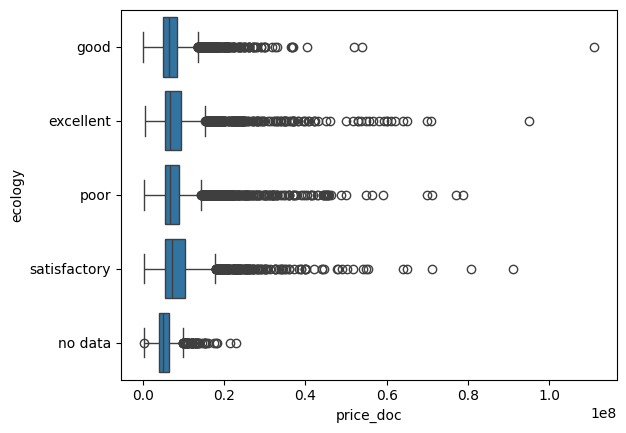

In [4]:
sns.boxplot(x=sber_data['price_doc'], y=sber_data['ecology'], data=sber_data);

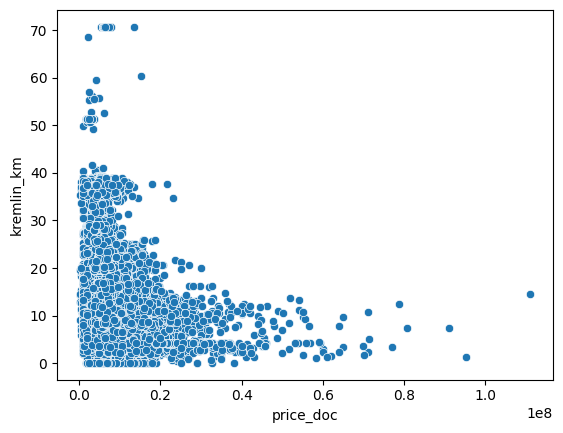

In [22]:
sns.scatterplot(data=sber_data, x='price_doc', y='kremlin_km');

In [8]:
cols_null_percent = sber_data.isnull().mean() * 100
display(cols_null_percent>0)
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null) # Series - where Index- name of column with NaN; Value- % of NaN

id                   False
full_sq              False
life_sq               True
floor                 True
sub_area             False
                     ...  
theater_km           False
museum_km            False
ecology              False
mosque_count_1000    False
price_doc            False
Length: 61, dtype: bool

hospital_beds_raion          47.392603
preschool_quota              21.948738
school_quota                 21.938893
life_sq                      20.947786
floor                         0.548062
metro_min_walk                0.082045
metro_km_walk                 0.082045
railroad_station_walk_km      0.082045
railroad_station_walk_min     0.082045
dtype: float64

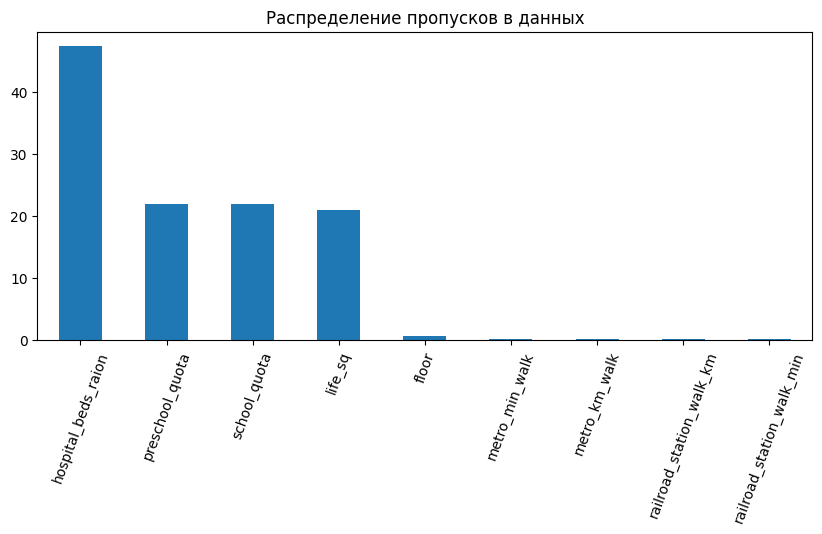

In [32]:
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    rot=70,
    title='Распределение пропусков в данных'
);

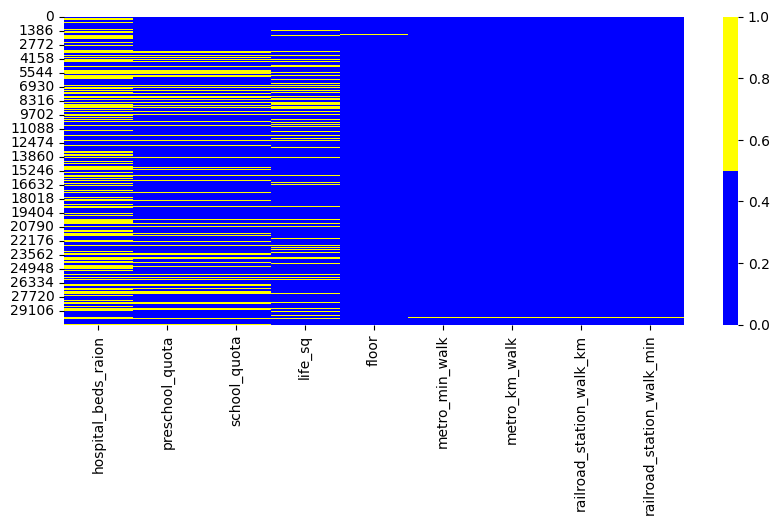

In [52]:
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
# print(sber_data[cols].isnull())
ax = sns.heatmap(
    sber_data[cols].isnull(),  # DataFrame colomns- columns of sber_data with NaN; raws- raws of sber_data
    cmap=sns.color_palette(colors),
    # cmap=colors
)


In [56]:
#создаем копию исходной таблицы
drop_data = sber_data.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_data.shape[0]*0.7  # tresh = len(drop_data.index)
# tresh = len(drop_data.index)*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(thresh=thresh, axis=1)
#удаляем записи, в которых есть хотя бы 1 пропуск
drop_data = drop_data.dropna(how='any')
#отображаем результирующую долю пропусков
drop_data.isnull().mean()


id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

In [57]:
drop_data.shape

(20888, 60)

,hospital_beds_raion,preschool_quota,school_quota,life_sq,floor,metro_min_walk,metro_km_walk,railroad_station_walk_km,railroad_station_walk_min
0,240.0,5001.0,11065.0,27.0,4.0,13.575119,1.131260,5.419893,65.038716
1,229.0,3119.0,6237.0,19.0,3.0,7.620630,0.635053,3.411993,40.943917
2,1183.0,1463.0,5580.0,29.0,2.0,17.351515,1.445960,1.277658,15.331896
3,NaN,6839.0,17063.0,50.0,9.0,11.565624,0.963802,4.291432,51.497190
4,562.0,3240.0,7770.0,77.0,4.0,8.266305,0.688859,0.853960,10.247521
...,...,...,...,...,...,...,...,...,...
30466,NaN,5088.0,12721.0,27.0,7.0,8.158093,0.679841,3.147161,37.765933
30467,1046.0,1874.0,6772.0,59.0,3.0,9.374609,0.781217,0.902227,10.826720
30468,NaN,NaN,NaN,NaN,10.0,20.666800,1.722233,3.735666,44.827989
30469,3300.0,2372.0,6083.0,32.0,5.0,24.567748,2.047312,6.895862,82.750340


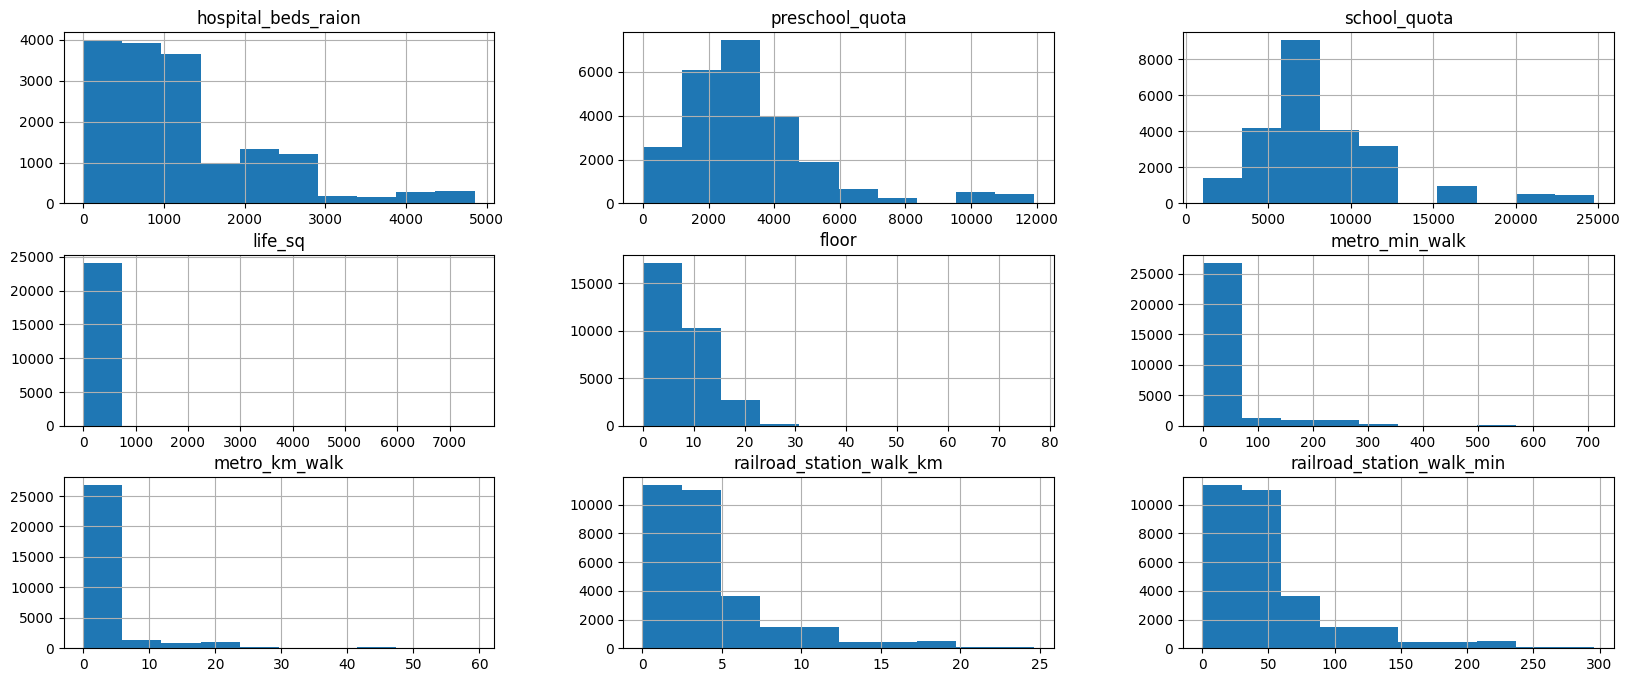

In [11]:
cols = cols_with_null.index
display(sber_data[cols])
sber_data[cols].hist(figsize=(20, 8));

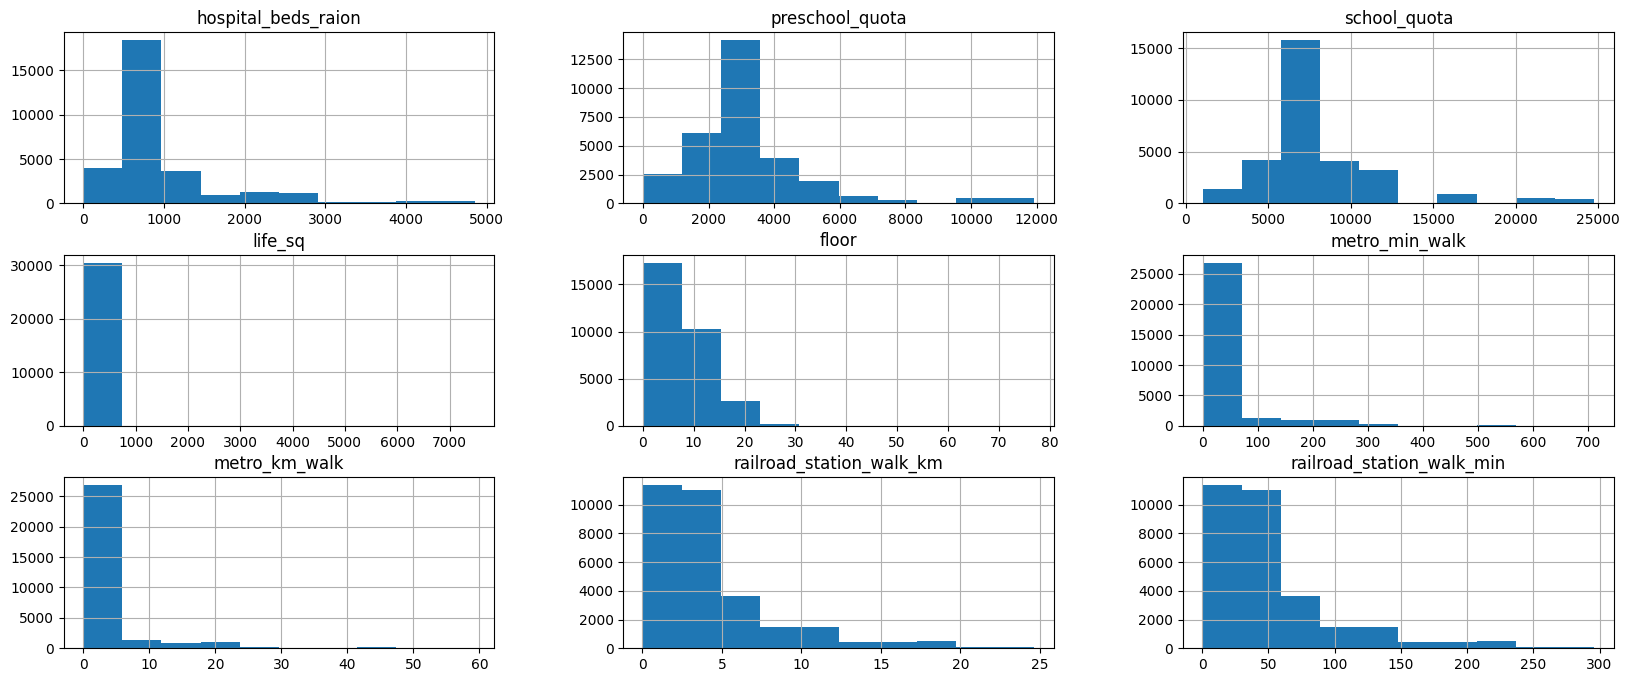

In [12]:
fill_data = sber_data.copy()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'life_sq': fill_data['full_sq'],
    'metro_min_walk': fill_data['metro_min_walk'].median(),
    'metro_km_walk': fill_data['metro_km_walk'].median(),
    'railroad_station_walk_km': fill_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': fill_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': fill_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': fill_data['preschool_quota'].mode()[0],
    'school_quota': fill_data['school_quota'].mode()[0],
    'floor': fill_data['floor'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем
fill_data = fill_data.fillna(values)
#выводим результирующую долю пропусков
fill_data.isnull().mean()
#Посмотрим, на то, как изменились распределения наших признаков:
cols = cols_with_null.index
fill_data[cols].hist(figsize=(20, 8));


In [23]:
#создаем копию исходной таблицы
indicator_data = sber_data.copy()
#в цикле пробегаемся по названиям столбцов с пропусками
for col in cols_with_null.index:
    #создаем новый признак-индикатор как col_was_null
    indicator_data[col + '_was_null'] = indicator_data[col].isnull()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски   
values = {
    'life_sq': indicator_data['full_sq'],
    'metro_min_walk': indicator_data['metro_min_walk'].median(),
    'metro_km_walk': indicator_data['metro_km_walk'].median(),
    'railroad_station_walk_km': indicator_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': indicator_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': indicator_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': indicator_data['preschool_quota'].mode()[0],
    'school_quota': indicator_data['school_quota'].mode()[0],
    'floor': indicator_data['floor'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем
indicator_data = indicator_data.fillna(values)
#выводим результирующую долю пропусков
indicator_data.isnull().mean()

id                                    0.0
full_sq                               0.0
life_sq                               0.0
floor                                 0.0
sub_area                              0.0
                                     ... 
floor_was_null                        0.0
metro_min_walk_was_null               0.0
metro_km_walk_was_null                0.0
railroad_station_walk_km_was_null     0.0
railroad_station_walk_min_was_null    0.0
Length: 70, dtype: float64

In [21]:

sber_data.isnull().sum()
sber_data.isnull().count()
sber_data.isnull().median()
sber_data.isnull().mean()

id                   0.000000
full_sq              0.000000
life_sq              0.209478
floor                0.005481
sub_area             0.000000
                       ...   
theater_km           0.000000
museum_km            0.000000
ecology              0.000000
mosque_count_1000    0.000000
price_doc            0.000000
Length: 61, dtype: float64

In [30]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    # print(iqr, quartile_3, quartile_1, lower_bound)
    return outliers, cleaned

In [31]:
outliers, cleaned = outliers_iqr(sber_data, 'full_sq')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

25.0 63.0 38.0 0.5
Число выбросов по методу Тьюки: 963
Результирующее число записей: 29508


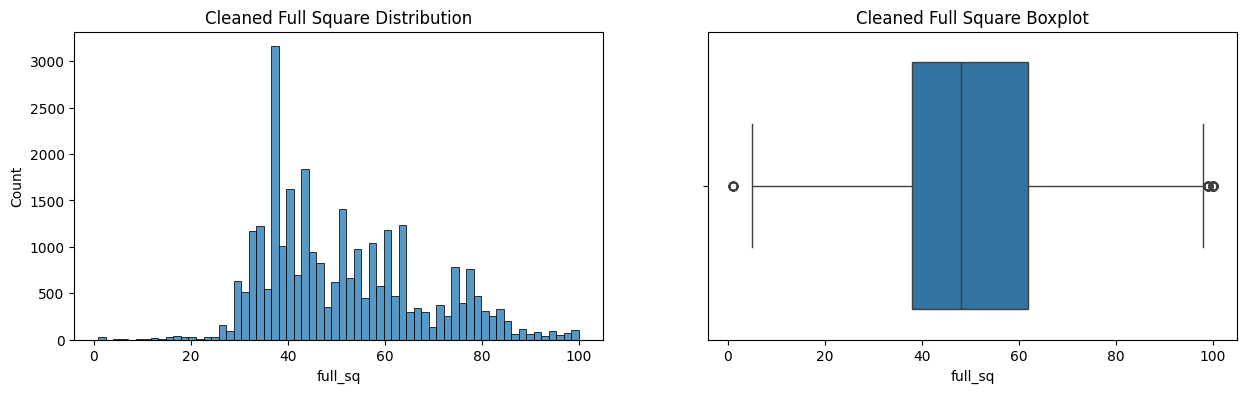

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');


Число выбросов по методу Тьюки: 92
Результирующее число записей: 30379


(92, 61)

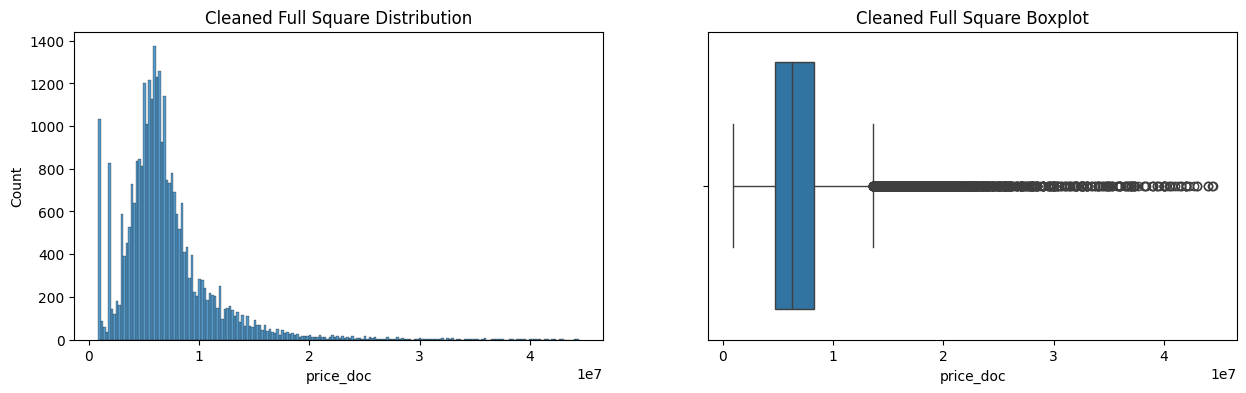

In [84]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=True):
    if log_scale == True:
        x=np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

# test_sber_data = pd.read_csv('test_sber_data.csv', sep=',')
features='price_doc'
outliers, cleaned=outliers_iqr_mod(sber_data, features, 3, 3, True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='price_doc', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='price_doc', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');
outliers.shape

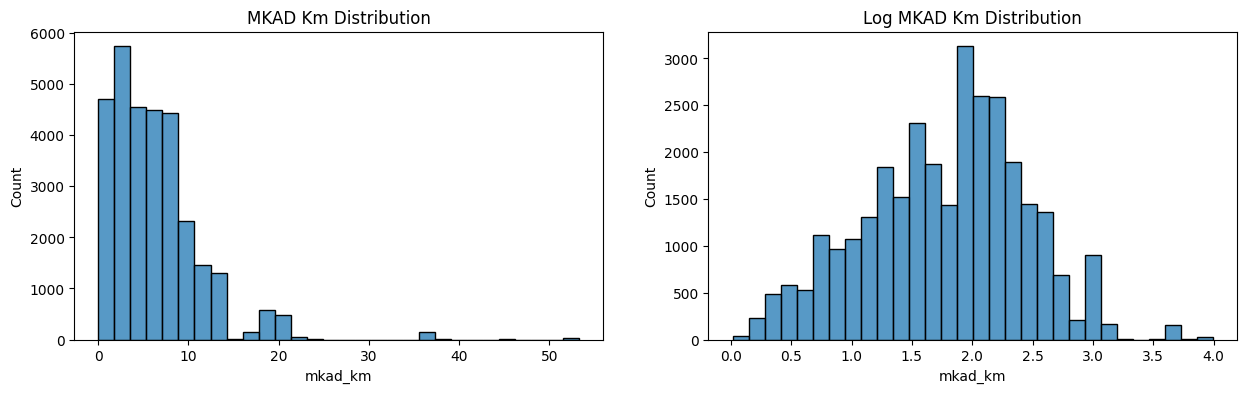

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма исходного признака
histplot = sns.histplot(sber_data['mkad_km'], bins=30, ax=axes[0])
histplot.set_title('MKAD Km Distribution');

#гистограмма в логарифмическом масштабе
log_mkad_km= np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km , bins=30, ax=axes[1])
histplot.set_title('Log MKAD Km Distribution');

In [51]:
print(log_mkad_km.skew())

-0.14263612203024953


In [52]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned



In [53]:
outliers, cleaned = outliers_z_score(sber_data, 'mkad_km', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 33
Результирующее число записей: 30438


In [54]:
print(outliers['sub_area'].unique())


['Poselenie Rogovskoe' 'Poselenie Kievskij']


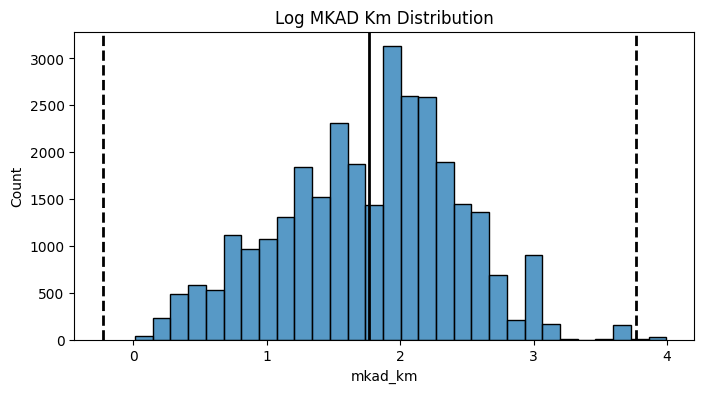

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_mkad_km = np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km, bins=30, ax=ax)
histplot.axvline(log_mkad_km.mean(), color='k', lw=2)
histplot.axvline(log_mkad_km.mean()+ 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.axvline(log_mkad_km.mean()- 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.set_title('Log MKAD Km Distribution');

In [66]:
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned


In [81]:
outliers, cleaned = outliers_z_score_mod(sber_data, 'price_doc', 3.7, 3.7, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 52
Результирующее число записей: 30419


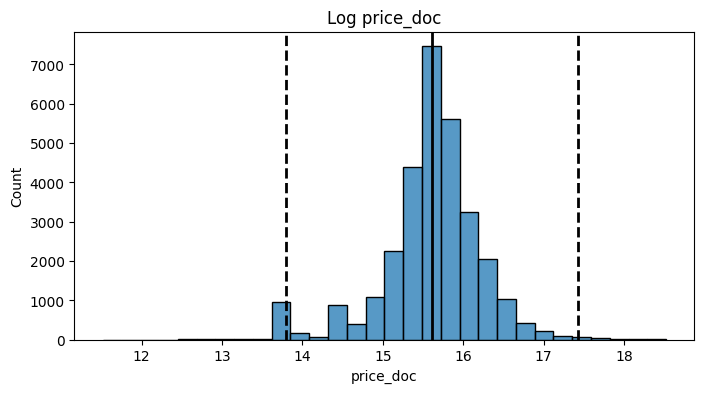

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_price = np.log(sber_data['price_doc'] + 1)
histplot = sns.histplot(log_price, bins=30, ax=ax)
histplot.axvline(log_price.mean(), color='k', lw=2)
histplot.axvline(log_price.mean()+ 3 * log_price.std(), color='k', ls='--', lw=2)
histplot.axvline(log_price.mean()- 3 * log_price.std(), color='k', ls='--', lw=2)
histplot.set_title('Log price_doc');

In [79]:
outliers, cleaned = outliers_z_score_mod(sber_data, 'price_doc', 3, 5, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 44
Результирующее число записей: 30427


In [4]:
sber_data['id'].nunique() == sber_data.shape[0]

True

In [50]:
dupl_columns=list(sber_data.columns)
dupl_columns.remove('id')
# print(dupl_columns)

mask = sber_data.duplicated(subset=dupl_columns)
# print(mask)
# print(mask.loc[lambda x: x == True])
# print(mask.value_counts())
sber_duplicates = sber_data[mask]
# print(sber_duplicates)
print(f'Число найденных дубликатов: {sber_duplicates.shape[0]}')
# sber_data.duplicated()

Число найденных дубликатов: 562


In [51]:
sber_dedupped = sber_data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {sber_dedupped.shape[0]}')

Результирующее число записей: 29909


In [52]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in sber_data.columns:
    #наибольшая относительная частота в признаке
    top_freq = sber_data[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = sber_data[col].nunique() / sber_data[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

id: 100.0% уникальных значений
oil_chemistry_raion: 99.03% одинаковых значений
railroad_terminal_raion: 96.27% одинаковых значений
nuclear_reactor_raion: 97.17% одинаковых значений
big_road1_1line: 97.44% одинаковых значений
mosque_count_1000: 98.08% одинаковых значений


In [53]:
information_sber_data = sber_data.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {information_sber_data.shape[1]}')

Результирующее число признаков: 55
